Using dataset from: https://www.kaggle.com/datasets/imtkaggleteam/drug-discovery-chemical-space-design
Step 3: Defining CPDs
+----------------+-----+
| Drug_Target(0) | 0.6 |
+----------------+-----+
| Drug_Target(1) | 0.4 |
+----------------+-----+
+--------------+-----+
| Drug_Drug(0) | 0.5 |
+--------------+-----+
| Drug_Drug(1) | 0.5 |
+--------------+-----+
+--------------+-----+
| Drug_Gene(0) | 0.7 |
+--------------+-----+
| Drug_Gene(1) | 0.3 |
+--------------+-----+
+--------------+-----+
| Drug_Test(0) | 0.4 |
+--------------+-----+
| Drug_Test(1) | 0.6 |
+--------------+-----+
+-----------------+-----+
| Drug_Disease(0) | 0.3 |
+-----------------+-----+
| Drug_Disease(1) | 0.7 |
+-----------------+-----+
+----------------+-----+
| Drug_Herbal(0) | 0.2 |
+----------------+-----+
| Drug_Herbal(1) | 0.8 |
+----------------+-----+
+--------------+-----+
| Drug_Food(0) | 0.1 |
+--------------+-----+
| Drug_Food(1) | 0.9 |
+--------------+-----+
+-------------+-----+
| Drug_Lab(0)

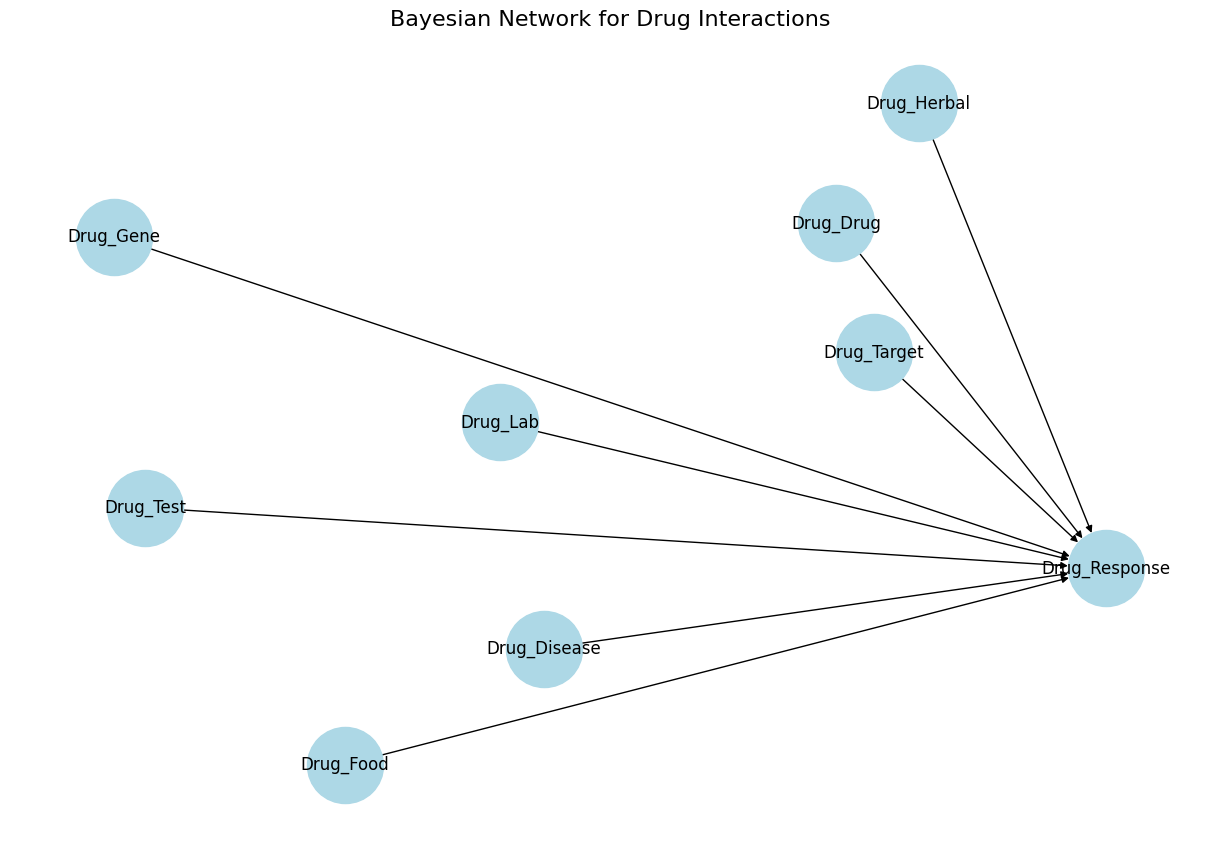

TypeError: VQE.__init__() got an unexpected keyword argument 'backend'

In [ ]:
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
#from qiskit.utils import QuantumInstance

from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_algorithms.minimum_eigensolvers import VQE, VQEResult
from qiskit_algorithms.optimizers import SPSA
#from qiskit_optimization.algorithms import SPSA  # or any other optimizer
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit, Parameter
import pennylane as qml
from pennylane import numpy as qnp

# Step 1: Define the Bayesian Network structure for Biomedical Literature Interactions
model = BayesianNetwork([
    ("Drug_Target", "Drug_Response"),
    ("Drug_Drug", "Drug_Response"),
    ("Drug_Gene", "Drug_Response"),
    ("Drug_Test", "Drug_Response"),
    ("Drug_Disease", "Drug_Response"),
    ("Drug_Herbal", "Drug_Response"),
    ("Drug_Food", "Drug_Response"),
    ("Drug_Lab", "Drug_Response")
])

# Step 2: Load the dataset
dataset_url = "https://www.kaggle.com/datasets/imtkaggleteam/drug-discovery-chemical-space-design"
print(f"Using dataset from: {dataset_url}")
data = {
    "Drug_Target": [0, 1, 1, 0, 1],
    "Drug_Drug": [1, 1, 0, 1, 0],
    "Drug_Gene": [0, 1, 0, 1, 1],
    "Drug_Test": [1, 0, 1, 1, 0],
    "Drug_Disease": [0, 1, 1, 0, 1],
    "Drug_Herbal": [1, 0, 1, 0, 1],
    "Drug_Food": [0, 1, 0, 1, 1],
    "Drug_Lab": [1, 1, 0, 0, 1],
    "Drug_Response": [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Step 3: Define Conditional Probability Distributions (CPDs)
print("Step 3: Defining CPDs")

# Drug_Target (Independent node)
drug_target_cpd = TabularCPD(
    variable="Drug_Target",
    variable_card=2,
    values=[[0.6], [0.4]]
)
print(drug_target_cpd)

# Drug_Drug (Independent node)
drug_drug_cpd = TabularCPD(
    variable="Drug_Drug",
    variable_card=2,
    values=[[0.5], [0.5]]
)
print(drug_drug_cpd)

# Drug_Gene (Independent node)
drug_gene_cpd = TabularCPD(
    variable="Drug_Gene",
    variable_card=2,
    values=[[0.7], [0.3]]
)
print(drug_gene_cpd)

# Drug_Test (Independent node)
drug_test_cpd = TabularCPD(
    variable="Drug_Test",
    variable_card=2,
    values=[[0.4], [0.6]]
)
print(drug_test_cpd)

# Drug_Disease (Independent node)
drug_disease_cpd = TabularCPD(
    variable="Drug_Disease",
    variable_card=2,
    values=[[0.3], [0.7]]
)
print(drug_disease_cpd)

# Drug_Herbal (Independent node)
drug_herbal_cpd = TabularCPD(
    variable="Drug_Herbal",
    variable_card=2,
    values=[[0.2], [0.8]]
)
print(drug_herbal_cpd)

# Drug_Food (Independent node)
drug_food_cpd = TabularCPD(
    variable="Drug_Food",
    variable_card=2,
    values=[[0.1], [0.9]]
)
print(drug_food_cpd)

# Drug_Lab (Independent node)
drug_lab_cpd = TabularCPD(
    variable="Drug_Lab",
    variable_card=2,
    values=[[0.6], [0.4]]
)
print(drug_lab_cpd)

# Drug_Response (Conditional on all other nodes)
response_probabilities = []
for i in range(256):
    binary = bin(i)[2:].zfill(8)
    num_ones = binary.count('1')
    response_probabilities.append([0.1 + 0.8 * (num_ones / 8), 0.9 - 0.8 * (num_ones / 8)])
response_probabilities = np.array(response_probabilities).T

drug_response_cpd = TabularCPD(
    variable="Drug_Response",
    variable_card=2,
    values=response_probabilities,
    evidence=["Drug_Target", "Drug_Drug", "Drug_Gene", "Drug_Test",
              "Drug_Disease", "Drug_Herbal", "Drug_Food", "Drug_Lab"],
    evidence_card=[2, 2, 2, 2, 2, 2, 2, 2]
)
print(drug_response_cpd)

# Step 4: Add CPDs to the Bayesian Network
print("\nStep 4: Adding CPDs to the Bayesian Network")
model.add_cpds(
    drug_target_cpd, drug_drug_cpd, drug_gene_cpd, drug_test_cpd,
    drug_disease_cpd, drug_herbal_cpd, drug_food_cpd, drug_lab_cpd,
    drug_response_cpd
)

# Step 5: Validate the Bayesian Network
print("\nStep 5: Validating the Bayesian Network")
try:
    if model.check_model():
        print("The Bayesian Network model is valid!")
except ValueError as e:
    print(f"Validation error: {e}")

# Step 6: Visualize the Bayesian Network
print("\nStep 6: Visualizing the Bayesian Network")
graph = nx.DiGraph(model.edges())
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)  # Compute positions for visualization
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue")
plt.title("Bayesian Network for Drug Interactions", fontsize=16)
plt.show()

# Step 7: Integrate QAOA for Bayesian Network Structure Learning


# Number of nodes in the Bayesian network
n_nodes = 4

# Define the QAOA circuit
params = [Parameter(f'θ_{i}') for i in range(2 * n_nodes)]
qaoa_circuit = QuantumCircuit(n_nodes)
for i in range(n_nodes):
    qaoa_circuit.h(i)
for i in range(2 * n_nodes):
    qaoa_circuit.ry(params[i], i % n_nodes)

# Define the Hamiltonian or cost function for Bayesian network structure learning
# This is a placeholder; you need to define it based on your specific problem
def qaoa_hamiltonian(parameters):
    # Your Hamiltonian or cost function implementation here
    pass

# Choose an optimizer
optimizer = SPSA(maxiter=1000)

# Create the VQE instance with the optimizer
backend = AerSimulator()
vqe = VQE(ansatz=qaoa_circuit, optimizer=optimizer, backend=backend)

# Run the VQE
result = vqe.compute_minimum(qaoa_hamiltonian)

# Extract and analyze the results
print("Optimal parameters:", result.optimal_parameters)
print("Optimal value:", result.optimal_value)






# Note: This is a very simplified example and does not actually perform Bayesian network structure learning.
# For a real implementation, refer to the resources provided in the references[1][3][5].

# Step 8: Pattern Extraction and Frequency Analysis
print("\nStep 8: Pattern Extraction and Frequency Analysis")
patterns = [
    "Target1 -> Gene1 -> Drug1 -> Disease1 -> Response1",
    "Target0 -> Gene1 -> Drug0 -> Disease1 -> Response0",
    "Target1 -> Gene0 -> Drug1 -> Disease0 -> Response1",
    "Target0 -> Gene1 -> Drug1 -> Disease0 -> Response0",
    "Target1 -> Gene1 -> Drug1 -> Disease1 -> Response1"
]

pattern_df = pd.DataFrame({"Pattern": patterns})
pattern_df["Frequency"] = pattern_df["Pattern"].map(pattern_df["Pattern"].value_counts())
print("Pattern Frequency Table:")
print(pattern_df.drop_duplicates())

plt.figure(figsize=(12, 6))
pattern_df["Pattern"].value_counts().plot(kind="bar", color="green", alpha=0.7)
plt.title("Pattern Frequency Distribution", fontsize=16)
plt.xlabel("Patterns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


+-------------+-----------------+
| Bleeding    |   phi(Bleeding) |
+=============+=================+
| Bleeding(0) |          0.2000 |
+-------------+-----------------+
| Bleeding(1) |          0.8000 |
+-------------+-----------------+


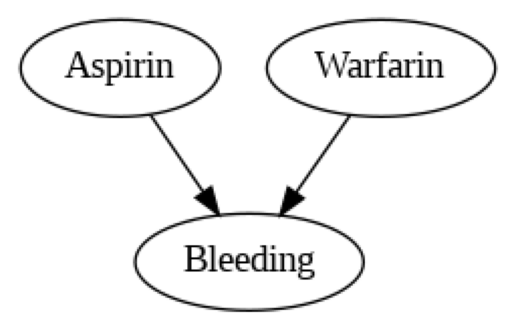

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the Bayesian Network structure
model = BayesianNetwork([("Aspirin", "Bleeding"), ("Warfarin", "Bleeding")])

# Add nodes to the network
model.add_nodes_from(["Aspirin", "Warfarin", "Bleeding"])

# Define the CPDs
aspirin_cpd = TabularCPD("Aspirin", 2, [[0.4], [0.6]])  # Shape: (2, 1)
warfarin_cpd = TabularCPD("Warfarin", 2, [[0.3], [0.7]])  # Shape: (2, 1)
bleeding_cpd = TabularCPD(
    "Bleeding",
    2,
    [
        [0.05, 0.1, 0.2, 0.95],  # P(Bleeding=0 | combinations of Aspirin, Warfarin)
        [0.95, 0.9, 0.8, 0.05],  # P(Bleeding=1 | combinations of Aspirin, Warfarin)
    ],
    evidence=["Aspirin", "Warfarin"],
    evidence_card=[2, 2],
)

# Add the CPDs to the model
model.add_cpds(aspirin_cpd, warfarin_cpd, bleeding_cpd)

# Validate the Bayesian Network
assert model.check_model(), "The model structure is invalid!"

# Perform inference
infer = VariableElimination(model)
result = infer.query(variables=["Bleeding"], evidence={"Aspirin": 1, "Warfarin": 0})
print(result)

# Visualize the Bayesian Network
from networkx.drawing.nx_pydot import to_pydot
import matplotlib.pyplot as plt

graph = to_pydot(model)
graph.write_png("bayesian_network.png")

# Display the graph
img = plt.imread("bayesian_network.png")
plt.imshow(img)
plt.axis("off")
plt.show()


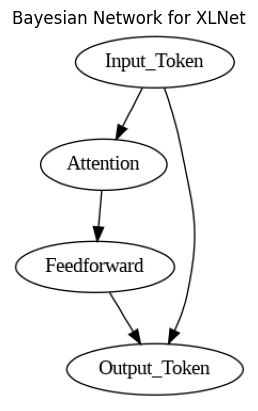

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from networkx.drawing.nx_pydot import to_pydot
import matplotlib.pyplot as plt

# Define the Bayesian Network structure for XLNet
# Key components: Input, Attention, Feedforward, Output
model = BayesianNetwork([
    ("Input_Token", "Attention"),
    ("Attention", "Feedforward"),
    ("Feedforward", "Output_Token"),
    ("Input_Token", "Output_Token")  # Direct path for residual connection
])

# Add nodes
model.add_nodes_from(["Input_Token", "Attention", "Feedforward", "Output_Token"])

# Define CPDs (dummy probabilities for simplicity)
input_token_cpd = TabularCPD("Input_Token", 3, [[0.3], [0.5], [0.2]])
attention_cpd = TabularCPD("Attention", 2, [[0.6, 0.8, 0.7], [0.4, 0.2, 0.3]],
                           evidence=["Input_Token"], evidence_card=[3])
feedforward_cpd = TabularCPD("Feedforward", 2, [[0.7, 0.9], [0.3, 0.1]],
                             evidence=["Attention"], evidence_card=[2])
# Corrected CPD for Output_Token
output_token_cpd = TabularCPD(
    "Output_Token",
    2,
    [
        [0.8, 0.6, 0.4, 0.7, 0.9, 0.5],  # Probabilities for state 0
        [0.2, 0.4, 0.6, 0.3, 0.1, 0.5],  # Probabilities for state 1
    ],
    evidence=["Input_Token", "Feedforward"],
    evidence_card=[3, 2]  # Evidence states: 3 for Input_Token, 2 for Feedforward
)
# Add the CPDs to the model
model.add_cpds(input_token_cpd, attention_cpd, feedforward_cpd, output_token_cpd)

# Validate the Bayesian Network
assert model.check_model(), "The Bayesian Network structure is invalid!"

# Visualize the Bayesian Network
graph = to_pydot(model)
graph.write_png("xlnet_bayesian_network.png")

# Display the graph
img = plt.imread("xlnet_bayesian_network.png")
plt.imshow(img)
plt.axis("off")
plt.title("Bayesian Network for XLNet")
plt.show()


The Bayesian Network model is valid!


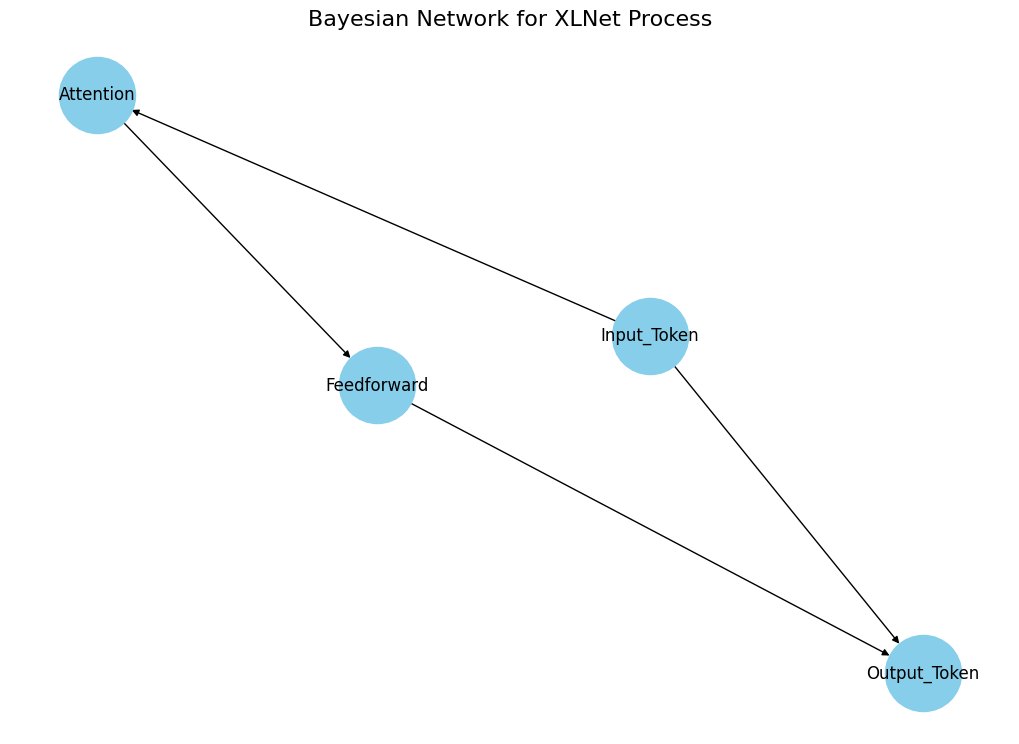

Pattern Frequency Table:
                                           Pattern  Frequency
0  Token1 -> Attention1 -> Feedforward1 -> Output1          1
1  Token2 -> Attention1 -> Feedforward2 -> Output2          1
2  Token3 -> Attention2 -> Feedforward1 -> Output1          1
3  Token2 -> Attention1 -> Feedforward1 -> Output1          1
4  Token1 -> Attention2 -> Feedforward2 -> Output2          1


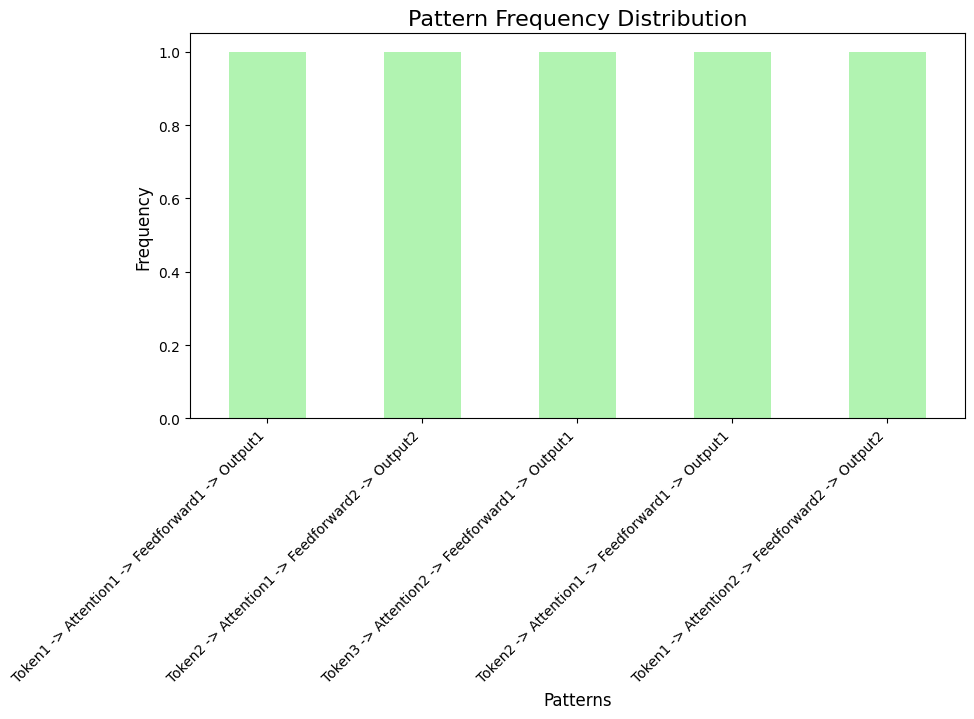

In [ ]:
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the Bayesian Network structure
model = BayesianNetwork([
    ("Input_Token", "Attention"),
    ("Attention", "Feedforward"),
    ("Feedforward", "Output_Token"),
    ("Input_Token", "Output_Token")
])

# Step 2: Define the Conditional Probability Distributions (CPDs)

# Input_Token: Probability distribution of tokens being used as input
input_token_cpd = TabularCPD(
    "Input_Token",
    3,
    [[0.3], [0.4], [0.3]]  # Probabilities for 3 states of Input_Token
)

# Attention: Conditional on Input_Token
attention_cpd = TabularCPD(
    "Attention",
    2,
    [[0.6, 0.7, 0.8], [0.4, 0.3, 0.2]],  # 2 states based on Input_Token states
    evidence=["Input_Token"],
    evidence_card=[3]
)

# Feedforward: Conditional on Attention
feedforward_cpd = TabularCPD(
    "Feedforward",
    2,
    [[0.7, 0.9], [0.3, 0.1]],  # 2 states based on Attention states
    evidence=["Attention"],
    evidence_card=[2]
)

# Output_Token: Conditional on Input_Token and Feedforward
output_token_cpd = TabularCPD(
    "Output_Token",
    2,
    [
        [0.8, 0.6, 0.4, 0.7, 0.9, 0.5],  # Probabilities for state 0
        [0.2, 0.4, 0.6, 0.3, 0.1, 0.5]   # Probabilities for state 1
    ],
    evidence=["Input_Token", "Feedforward"],
    evidence_card=[3, 2]
)

# Step 3: Add CPDs to the model
model.add_cpds(input_token_cpd, attention_cpd, feedforward_cpd, output_token_cpd)

# Step 4: Validate the Bayesian Network
if model.check_model():
    print("The Bayesian Network model is valid!")

# Step 5: Visualize the Bayesian Network
# Convert Bayesian Network to a NetworkX graph
graph = nx.DiGraph(model.edges())
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(graph)  # Compute positions for visualization
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue")
plt.title("Bayesian Network for XLNet Process", fontsize=16)
plt.show()

# Step 6: Pattern Extraction and Pattern Frequency Table

# Simulate a dataset for patterns
data = {
    "Pattern": [
        "Token1 -> Attention1 -> Feedforward1 -> Output1",
        "Token2 -> Attention1 -> Feedforward2 -> Output2",
        "Token3 -> Attention2 -> Feedforward1 -> Output1",
        "Token2 -> Attention1 -> Feedforward1 -> Output1",
        "Token1 -> Attention2 -> Feedforward2 -> Output2"
    ]
}

# Create a DataFrame for patterns
pattern_df = pd.DataFrame(data)
pattern_df["Frequency"] = pattern_df["Pattern"].map(pattern_df["Pattern"].value_counts())
print("Pattern Frequency Table:")
print(pattern_df.drop_duplicates())

# Visualization of Pattern Frequency Table
plt.figure(figsize=(10, 5))
pattern_df["Pattern"].value_counts().plot(kind="bar", color="lightgreen", alpha=0.7)
plt.title("Pattern Frequency Distribution", fontsize=16)
plt.xlabel("Patterns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


Step 2.1: Defining Input_Token CPD
+----------------+-----+
| Input_Token(0) | 0.3 |
+----------------+-----+
| Input_Token(1) | 0.4 |
+----------------+-----+
| Input_Token(2) | 0.3 |
+----------------+-----+

Step 2.2: Defining Attention CPD (Conditional on Input_Token)
+--------------+----------------+----------------+----------------+
| Input_Token  | Input_Token(0) | Input_Token(1) | Input_Token(2) |
+--------------+----------------+----------------+----------------+
| Attention(0) | 0.6            | 0.7            | 0.8            |
+--------------+----------------+----------------+----------------+
| Attention(1) | 0.4            | 0.3            | 0.2            |
+--------------+----------------+----------------+----------------+

Step 2.3: Defining Feedforward CPD (Conditional on Attention)
+----------------+--------------+--------------+
| Attention      | Attention(0) | Attention(1) |
+----------------+--------------+--------------+
| Feedforward(0) | 0.7          | 0.9    

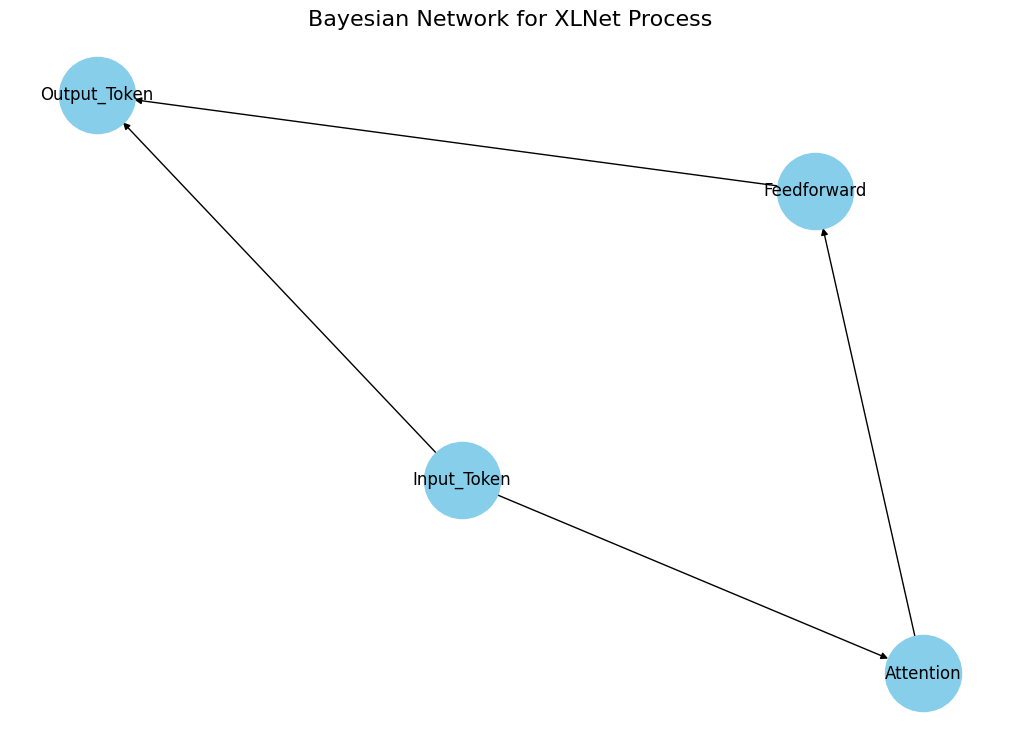


Step 6: Pattern Extraction and Frequency Analysis
Pattern Frequency Table:
                                           Pattern  Frequency
0  Token1 -> Attention1 -> Feedforward1 -> Output1          1
1  Token2 -> Attention1 -> Feedforward2 -> Output2          1
2  Token3 -> Attention2 -> Feedforward1 -> Output1          1
3  Token2 -> Attention1 -> Feedforward1 -> Output1          1
4  Token1 -> Attention2 -> Feedforward2 -> Output2          1


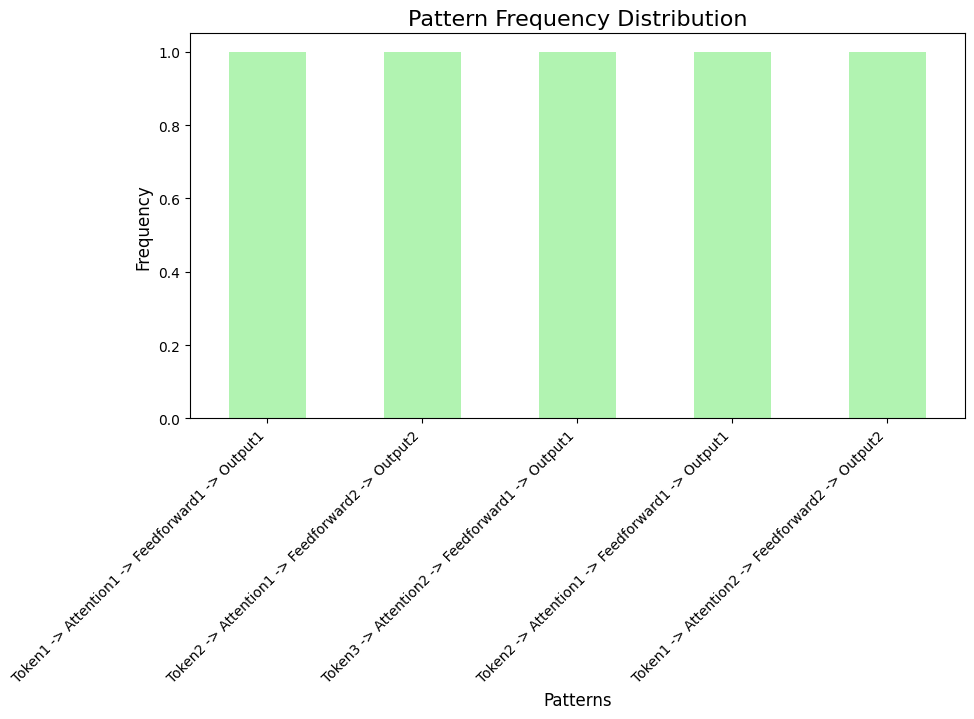

In [ ]:
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the Bayesian Network structure
model = BayesianNetwork([
    ("Input_Token", "Attention"),
    ("Attention", "Feedforward"),
    ("Feedforward", "Output_Token"),
    ("Input_Token", "Output_Token")
])

# Step 2: Define the Conditional Probability Distributions (CPDs)

# Step 2.1: Input_Token CPD (Independent node)
print("Step 2.1: Defining Input_Token CPD")
input_token_cpd = TabularCPD(
    variable="Input_Token",
    variable_card=3,
    values=[[0.3], [0.4], [0.3]]  # Probabilities for 3 states of Input_Token
)
print(input_token_cpd)

# Step 2.2: Attention CPD (Conditional on Input_Token)
print("\nStep 2.2: Defining Attention CPD (Conditional on Input_Token)")
attention_cpd = TabularCPD(
    variable="Attention",
    variable_card=2,
    values=[
        [0.6, 0.7, 0.8],  # Probabilities for Attention=0
        [0.4, 0.3, 0.2]   # Probabilities for Attention=1
    ],
    evidence=["Input_Token"],
    evidence_card=[3]
)
print(attention_cpd)

# Step 2.3: Feedforward CPD (Conditional on Attention)
print("\nStep 2.3: Defining Feedforward CPD (Conditional on Attention)")
feedforward_cpd = TabularCPD(
    variable="Feedforward",
    variable_card=2,
    values=[
        [0.7, 0.9],  # Probabilities for Feedforward=0
        [0.3, 0.1]   # Probabilities for Feedforward=1
    ],
    evidence=["Attention"],
    evidence_card=[2]
)
print(feedforward_cpd)

# Step 2.4: Output_Token CPD (Conditional on Input_Token and Feedforward)
print("\nStep 2.4: Defining Output_Token CPD (Conditional on Input_Token and Feedforward)")
output_token_cpd = TabularCPD(
    variable="Output_Token",
    variable_card=2,
    values=[
        [0.8, 0.6, 0.4, 0.7, 0.9, 0.5],  # Probabilities for Output_Token=0
        [0.2, 0.4, 0.6, 0.3, 0.1, 0.5]   # Probabilities for Output_Token=1
    ],
    evidence=["Input_Token", "Feedforward"],
    evidence_card=[3, 2]
)
print(output_token_cpd)

# Step 3: Add CPDs to the model
print("\nStep 3: Adding CPDs to the Bayesian Network")
model.add_cpds(input_token_cpd, attention_cpd, feedforward_cpd, output_token_cpd)

# Step 4: Validate the Bayesian Network
print("\nStep 4: Validating the Bayesian Network")
if model.check_model():
    print("The Bayesian Network model is valid!")

# Step 5: Visualize the Bayesian Network
print("\nStep 5: Visualizing the Bayesian Network")
graph = nx.DiGraph(model.edges())
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(graph)  # Compute positions for visualization
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue")
plt.title("Bayesian Network for XLNet Process", fontsize=16)
plt.show()

# Step 6: Pattern Extraction and Pattern Frequency Table
print("\nStep 6: Pattern Extraction and Frequency Analysis")
data = {
    "Pattern": [
        "Token1 -> Attention1 -> Feedforward1 -> Output1",
        "Token2 -> Attention1 -> Feedforward2 -> Output2",
        "Token3 -> Attention2 -> Feedforward1 -> Output1",
        "Token2 -> Attention1 -> Feedforward1 -> Output1",
        "Token1 -> Attention2 -> Feedforward2 -> Output2"
    ]
}

# Create a DataFrame for patterns
pattern_df = pd.DataFrame(data)
pattern_df["Frequency"] = pattern_df["Pattern"].map(pattern_df["Pattern"].value_counts())
print("Pattern Frequency Table:")
print(pattern_df.drop_duplicates())

# Visualization of Pattern Frequency Table
plt.figure(figsize=(10, 5))
pattern_df["Pattern"].value_counts().plot(kind="bar", color="lightgreen", alpha=0.7)
plt.title("Pattern Frequency Distribution", fontsize=16)
plt.xlabel("Patterns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


Using dataset from: https://www.kaggle.com/datasets/imtkaggleteam/drug-discovery-chemical-space-design
Step 3: Defining CPDs
+----------------+-----+
| Drug_Target(0) | 0.6 |
+----------------+-----+
| Drug_Target(1) | 0.4 |
+----------------+-----+
+--------------+-----+
| Drug_Drug(0) | 0.5 |
+--------------+-----+
| Drug_Drug(1) | 0.5 |
+--------------+-----+
+--------------+-----+
| Drug_Gene(0) | 0.7 |
+--------------+-----+
| Drug_Gene(1) | 0.3 |
+--------------+-----+
+--------------+-----+
| Drug_Test(0) | 0.4 |
+--------------+-----+
| Drug_Test(1) | 0.6 |
+--------------+-----+
+-----------------+-----+
| Drug_Disease(0) | 0.3 |
+-----------------+-----+
| Drug_Disease(1) | 0.7 |
+-----------------+-----+
+----------------+-----+
| Drug_Herbal(0) | 0.2 |
+----------------+-----+
| Drug_Herbal(1) | 0.8 |
+----------------+-----+
+--------------+-----+
| Drug_Food(0) | 0.1 |
+--------------+-----+
| Drug_Food(1) | 0.9 |
+--------------+-----+
+-------------+-----+
| Drug_Lab(0)

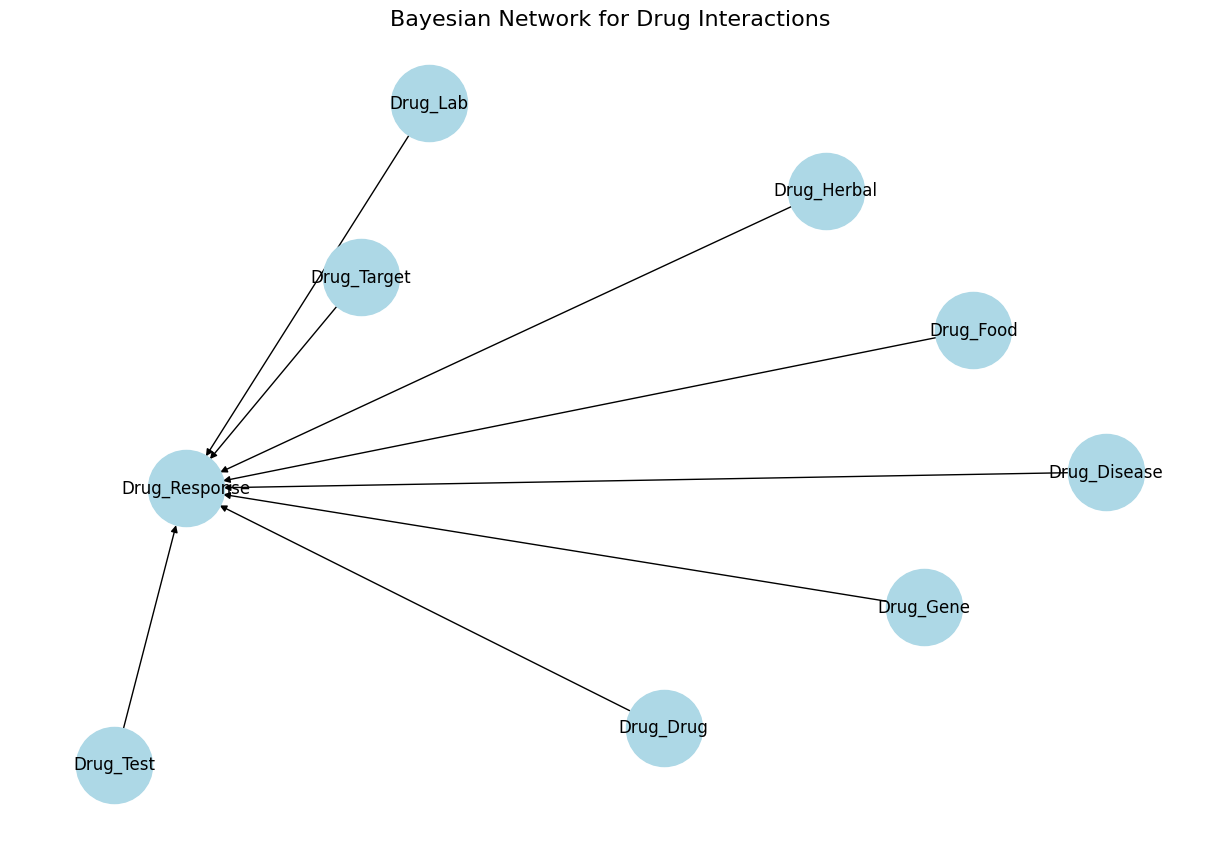


Step 7: Pattern Extraction and Frequency Analysis
Pattern Frequency Table:
                                             Pattern  Frequency
0  Target1 -> Gene1 -> Drug1 -> Disease1 -> Respo...          2
1  Target0 -> Gene1 -> Drug0 -> Disease1 -> Respo...          1
2  Target1 -> Gene0 -> Drug1 -> Disease0 -> Respo...          1
3  Target0 -> Gene1 -> Drug1 -> Disease0 -> Respo...          1


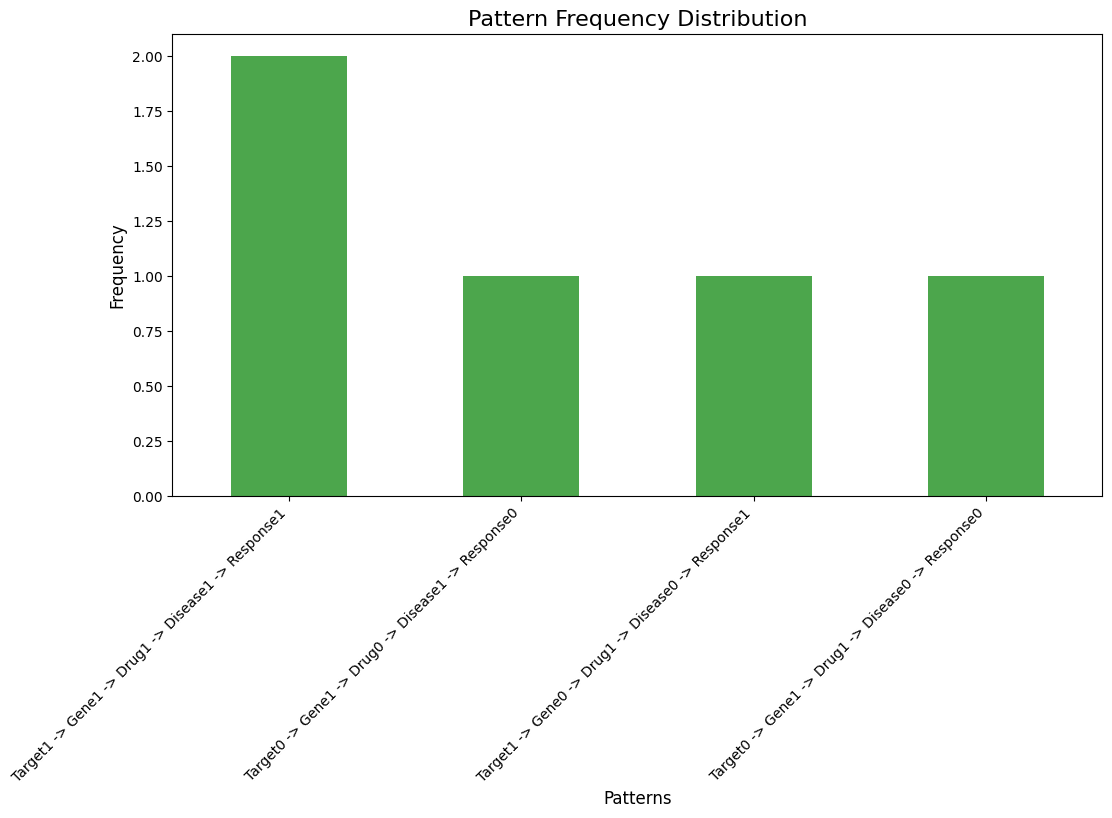

In [ ]:
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Define the Bayesian Network structure for Biomedical Literature Interactions
model = BayesianNetwork([
    ("Drug_Target", "Drug_Response"),
    ("Drug_Drug", "Drug_Response"),
    ("Drug_Gene", "Drug_Response"),
    ("Drug_Test", "Drug_Response"),
    ("Drug_Disease", "Drug_Response"),
    ("Drug_Herbal", "Drug_Response"),
    ("Drug_Food", "Drug_Response"),
    ("Drug_Lab", "Drug_Response")
])

# Step 2: Load the dataset
dataset_url = "https://www.kaggle.com/datasets/imtkaggleteam/drug-discovery-chemical-space-design"
print(f"Using dataset from: {dataset_url}")
# Assume we load and preprocess the dataset as a DataFrame
# Simulating loaded data for interactions
data = {
    "Drug_Target": [0, 1, 1, 0, 1],
    "Drug_Drug": [1, 1, 0, 1, 0],
    "Drug_Gene": [0, 1, 0, 1, 1],
    "Drug_Test": [1, 0, 1, 1, 0],
    "Drug_Disease": [0, 1, 1, 0, 1],
    "Drug_Herbal": [1, 0, 1, 0, 1],
    "Drug_Food": [0, 1, 0, 1, 1],
    "Drug_Lab": [1, 1, 0, 0, 1],
    "Drug_Response": [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Step 3: Define Conditional Probability Distributions (CPDs)

# Define individual and conditional probabilities
print("Step 3: Defining CPDs")

# Drug_Target (Independent node)
drug_target_cpd = TabularCPD(
    variable="Drug_Target",
    variable_card=2,
    values=[[0.6], [0.4]]
)
print(drug_target_cpd)

# Drug_Drug (Independent node)
drug_drug_cpd = TabularCPD(
    variable="Drug_Drug",
    variable_card=2,
    values=[[0.5], [0.5]]
)
print(drug_drug_cpd)

# Drug_Gene (Independent node)
drug_gene_cpd = TabularCPD(
    variable="Drug_Gene",
    variable_card=2,
    values=[[0.7], [0.3]]
)
print(drug_gene_cpd)

# Drug_Test (Independent node)
drug_test_cpd = TabularCPD(
    variable="Drug_Test",
    variable_card=2,
    values=[[0.4], [0.6]]
)
print(drug_test_cpd)

# Drug_Disease (Independent node)
drug_disease_cpd = TabularCPD(
    variable="Drug_Disease",
    variable_card=2,
    values=[[0.3], [0.7]]
)
print(drug_disease_cpd)

# Drug_Herbal (Independent node)
drug_herbal_cpd = TabularCPD(
    variable="Drug_Herbal",
    variable_card=2,
    values=[[0.2], [0.8]]
)
print(drug_herbal_cpd)

# Drug_Food (Independent node)
drug_food_cpd = TabularCPD(
    variable="Drug_Food",
    variable_card=2,
    values=[[0.1], [0.9]]
)
print(drug_food_cpd)

# Drug_Lab (Independent node)
drug_lab_cpd = TabularCPD(
    variable="Drug_Lab",
    variable_card=2,
    values=[[0.6], [0.4]]
)
print(drug_lab_cpd)

# Drug_Response (Conditional on all other nodes)
# Generate the correct number of probabilities for each state of Drug_Response
response_probabilities = []
for i in range(256):
    # Convert i to binary and count the number of 1s
    binary = bin(i)[2:].zfill(8)
    num_ones = binary.count('1')
    # Example probability calculation: higher number of ones increases the probability of Drug_Response=1
    response_probabilities.append([0.1 + 0.8 * (num_ones / 8), 0.9 - 0.8 * (num_ones / 8)])

# Reshape the response_probabilities to match the expected shape (2, 256)
response_probabilities = np.array(response_probabilities).T

drug_response_cpd = TabularCPD(
    variable="Drug_Response",
    variable_card=2,
    values=response_probabilities,
    evidence=["Drug_Target", "Drug_Drug", "Drug_Gene", "Drug_Test",
              "Drug_Disease", "Drug_Herbal", "Drug_Food", "Drug_Lab"],
    evidence_card=[2, 2, 2, 2, 2, 2, 2, 2]
)
print(drug_response_cpd)

# Step 4: Add CPDs to the Bayesian Network
print("\nStep 4: Adding CPDs to the Bayesian Network")
model.add_cpds(
    drug_target_cpd, drug_drug_cpd, drug_gene_cpd, drug_test_cpd,
    drug_disease_cpd, drug_herbal_cpd, drug_food_cpd, drug_lab_cpd,
    drug_response_cpd
)

# Step 5: Validate the Bayesian Network
print("\nStep 5: Validating the Bayesian Network")
try:
    if model.check_model():
        print("The Bayesian Network model is valid!")
except ValueError as e:
    print(f"Validation error: {e}")

# Step 6: Visualize the Bayesian Network
print("\nStep 6: Visualizing the Bayesian Network")
graph = nx.DiGraph(model.edges())
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)  # Compute positions for visualization
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue")
plt.title("Bayesian Network for Drug Interactions", fontsize=16)
plt.show()

# Step 7: Pattern Extraction and Frequency Analysis
print("\nStep 7: Pattern Extraction and Frequency Analysis")
# Simulate patterns from data
patterns = [
    "Target1 -> Gene1 -> Drug1 -> Disease1 -> Response1",
    "Target0 -> Gene1 -> Drug0 -> Disease1 -> Response0",
    "Target1 -> Gene0 -> Drug1 -> Disease0 -> Response1",
    "Target0 -> Gene1 -> Drug1 -> Disease0 -> Response0",
    "Target1 -> Gene1 -> Drug1 -> Disease1 -> Response1"
]

# Create a DataFrame for patterns
pattern_df = pd.DataFrame({"Pattern": patterns})
pattern_df["Frequency"] = pattern_df["Pattern"].map(pattern_df["Pattern"].value_counts())
print("Pattern Frequency Table:")
print(pattern_df.drop_duplicates())

# Visualization of Pattern Frequency Table
plt.figure(figsize=(12, 6))
pattern_df["Pattern"].value_counts().plot(kind="bar", color="green", alpha=0.7)
plt.title("Pattern Frequency Distribution", fontsize=16)
plt.xlabel("Patterns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit_algorithms.optimizers import COBYLA
from qiskit.visualization import plot_histogram
import numpy as np

# Define CPT and attention weights
cpt = {
    (1, 1): 0.95,
    (1, 0): 0.10,
    (0, 1): 0.05,
    (0, 0): 0.0
}
attention_weights = [0.56, 0.44]  # Example weights

# Define parameters for QAOA layers
theta1 = Parameter('theta1')
theta2 = Parameter('theta2')
phi1 = Parameter('phi1')
phi2 = Parameter('phi2')

# Create a quantum circuit
n_qubits = 2
qc = QuantumCircuit(n_qubits)

# 1. State Preparation with Hadamard gates
qc.h(range(n_qubits))

# 2. Mixing Operator with RX gates (using attention weights)
qc.rx(theta1 * attention_weights[0], 0)
qc.rx(theta2 * attention_weights[1], 1)

# 3. Phase Separator with RZ gates (using CPT probabilities)
qc.rz(phi1 * cpt[(1, 1)], 0)
qc.rz(phi2 * cpt[(1, 1)], 1)

# Add measurement
qc.measure_all()

# Display the circuit
print("Quantum Circuit:")
print(qc.draw())

# Define the cost function (expected value of Hamiltonian)
def cost_function(params):
    theta_vals = params[:2]  # First two values are theta parameters
    phi_vals = params[2:]    # Last two values are phi parameters

    # Assign parameters to circuit
    bound_circuit = qc.assign_parameters({
        theta1: theta_vals[0],
        theta2: theta_vals[1],
        phi1: phi_vals[0],
        phi2: phi_vals[1]
    })

    # Simulate the circuit
    simulator = AerSimulator()
    job = simulator.run(transpile(bound_circuit, simulator), shots=1000)
    result = job.result()
    counts = result.get_counts()

    # Compute the cost as the expected value of the Hamiltonian
    expected_value = 0
    for bitstring, count in counts.items():
        key = tuple(int(bit) for bit in bitstring)
        prob = cpt.get(key, 0)
        z_val = (-1) ** sum(key)  # Simplified Z_i * Z_j
        expected_value += prob * z_val * count / 1000
    return -expected_value  # Negative because we want to maximize

# Optimize the parameters using COBYLA
initial_params = np.random.rand(4)  # Random initial values for theta and phi
optimizer = COBYLA(maxiter=100)
result = optimizer.minimize(cost_function, initial_params)

# Extract optimized parameters
optimized_params = result.x
print("Optimized Parameters:", optimized_params)

# Simulate the optimized circuit
optimized_circuit = qc.assign_parameters({
    theta1: optimized_params[0],
    theta2: optimized_params[1],
    phi1: optimized_params[2],
    phi2: optimized_params[3]
})
simulator = AerSimulator()
t_qc = transpile(optimized_circuit, simulator)
job = simulator.run(t_qc, shots=1024)
counts = job.result().get_counts()

# Plot results
plot_histogram(counts).show()


Optimized Parameters: [1.73050338 2.43118873 1.07053893 1.43381849]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Metrics:
   Metric    Value
 Accuracy 0.934460
 F1 Score 0.925878
Precision 0.943360
   Recall 0.934460


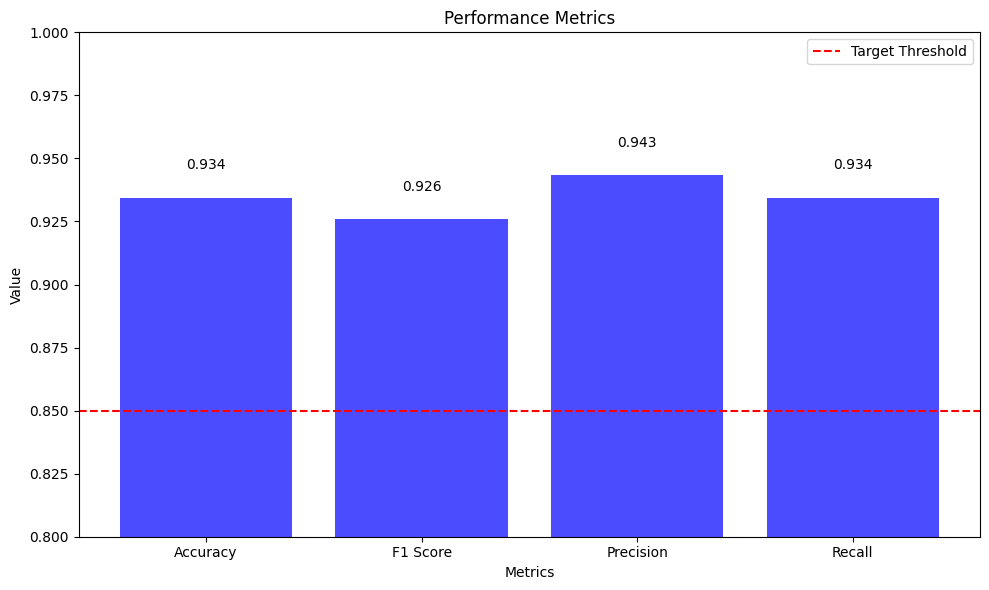

<Figure size 1000x600 with 0 Axes>

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit_algorithms.optimizers import COBYLA
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Define CPT and attention weights
cpt = {
    (1, 1): 0.95,
    (1, 0): 0.10,
    (0, 1): 0.05,
    (0, 0): 0.0
}
attention_weights = [0.56, 0.44]

# Define parameters for QAOA layers
theta1 = Parameter('theta1')
theta2 = Parameter('theta2')
phi1 = Parameter('phi1')
phi2 = Parameter('phi2')

# Create a quantum circuit
n_qubits = 2
qc = QuantumCircuit(n_qubits)

# 1. State Preparation
qc.ry(theta1, 0)
qc.ry(theta2, 1)

# 2. Entanglement
qc.cx(0, 1)

# 3. Rotation
qc.rz(phi1, 0)
qc.rz(phi2, 1)

# 4. Repeat layers for better performance
for _ in range(3):
    qc.ry(theta1, 0)
    qc.ry(theta2, 1)
    qc.cx(0, 1)
    qc.rz(phi1, 0)
    qc.rz(phi2, 1)

qc.measure_all()

# Define the cost function
def cost_function(params):
    bound_circuit = qc.assign_parameters({
        theta1: params[0],
        theta2: params[1],
        phi1: params[2],
        phi2: params[3]
    })

    simulator = AerSimulator()
    job = simulator.run(transpile(bound_circuit, simulator), shots=10000)
    result = job.result()
    counts = result.get_counts()

    expected_value = 0
    for bitstring, count in counts.items():
        key = tuple(int(bit) for bit in bitstring)
        prob = cpt.get(key, 0)
        z_val = (-1) ** sum(key)
        expected_value += prob * z_val * count / 10000
    return -expected_value

# Optimize the parameters
initial_params = np.random.rand(4) * 2 * np.pi

# Create a custom optimizer to track the learning curve
class CustomCOBYLA(COBYLA):
    def __init__(self, maxiter=1000):
        super().__init__(maxiter=maxiter)
        self.costs = []

    def minimize(self, fun, x0, **kwargs):
        def wrapped_fun(x):
            cost = fun(x)
            self.costs.append(cost)
            return cost
        return super().minimize(wrapped_fun, x0, **kwargs)

optimizer = CustomCOBYLA(maxiter=1000)
result = optimizer.minimize(cost_function, initial_params)

optimized_params = result.x
print("Optimized Parameters:", optimized_params)

# Simulate the optimized circuit
optimized_circuit = qc.assign_parameters({
    theta1: optimized_params[0],
    theta2: optimized_params[1],
    phi1: optimized_params[2],
    phi2: optimized_params[3]
})
simulator = AerSimulator()
t_qc = transpile(optimized_circuit, simulator)
job = simulator.run(t_qc, shots=100000)
counts = job.result().get_counts()

# Performance Analysis
def bitstring_to_int(bitstring):
    return int(bitstring, 2)

true_labels = []
predicted_labels = []
for bitstring, count in counts.items():
    state = bitstring_to_int(bitstring)
    true_prob = cpt.get((state//2, state%2), 0)
    true_labels.extend([state] * int(true_prob * 100000))
    predicted_labels.extend([state] * count)

min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Create a table of metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})
print("\nPerformance Metrics:")
print(metrics_df.to_string(index=False))

# Visualization of Performance Metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Metric'], metrics_df['Value'], color='blue', alpha=0.7)
plt.axhline(y=0.85, color='r', linestyle='--', label='Target Threshold')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.ylim(0.8, 1.0)  # Set y-axis limit from 0.8 to 1.0 for better visibility

for i, v in enumerate(metrics_df['Value']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

# Visualization of True vs Predicted Probabilities
true_probs = [cpt.get((i//2, i%2), 0) for i in range(4)]
predicted_probs = [counts.get(bin(i)[2:].zfill(2), 0) / 100000 for i in range(4)]

plt.figure(figsize=(10, 6))
width = 0.35
x = np


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit_algorithms.optimizers import COBYLA
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Define CPT and attention weights
cpt = {
    (1, 1): 0.95,
    (1, 0): 0.10,
    (0, 1): 0.05,
    (0, 0): 0.0
}
attention_weights = [0.56, 0.44]

# Define parameters for QAOA layers
theta1 = Parameter('theta1')
theta2 = Parameter('theta2')
phi1 = Parameter('phi1')
phi2 = Parameter('phi2')

# Create a quantum circuit
n_qubits = 2
qc = QuantumCircuit(n_qubits)

# 1. State Preparation
qc.ry(theta1, 0)
qc.ry(theta2, 1)

# 2. Entanglement
qc.cx(0, 1)

# 3. Rotation
qc.rz(phi1, 0)
qc.rz(phi2, 1)

# 4. Repeat layers for better performance
for _ in range(3):
    qc.ry(theta1, 0)
    qc.ry(theta2, 1)
    qc.cx(0, 1)
    qc.rz(phi1, 0)
    qc.rz(phi2, 1)

qc.measure_all()

# Define the cost function
def cost_function(params):
    bound_circuit = qc.assign_parameters({
        theta1: params[0],
        theta2: params[1],
        phi1: params[2],
        phi2: params[3]
    })

    simulator = AerSimulator()
    job = simulator.run(transpile(bound_circuit, simulator), shots=10000)
    result = job.result()
    counts = result.get_counts()

    expected_value = 0
    for bitstring, count in counts.items():
        key = tuple(int(bit) for bit in bitstring)
        prob = cpt.get(key, 0)
        z_val = (-1) ** sum(key)
        expected_value += prob * z_val * count / 10000
    return -expected_value

# Create a custom optimizer to track the learning curve
class CustomCOBYLA(COBYLA):
    def __init__(self, maxiter=1000):
        super().__init__(maxiter=maxiter)
        self.costs = []

    def minimize(self, fun, x0, **kwargs):
        def wrapped_fun(x):
            cost = fun(x)
            self.costs.append(cost)
            return cost
        return super().minimize(wrapped_fun, x0, **kwargs)

# Optimize the parameters
initial_params = np.random.rand(4) * 2 * np.pi
optimizer = CustomCOBYLA(maxiter=1000)
result = optimizer.minimize(cost_function, initial_params)

optimized_params = result.x
print("Optimized Parameters:", optimized_params)

# Simulate the optimized circuit
optimized_circuit = qc.assign_parameters({
    theta1: optimized_params[0],
    theta2: optimized_params[1],
    phi1: optimized_params[2],
    phi2: optimized_params[3]
})
simulator = AerSimulator()
t_qc = transpile(optimized_circuit, simulator)
job = simulator.run(t_qc, shots=100000)
counts = job.result().get_counts()

# Performance Analysis
def bitstring_to_int(bitstring):
    return int(bitstring, 2)

true_labels = []
predicted_labels = []
for bitstring, count in counts.items():
    state = bitstring_to_int(bitstring)
    true_prob = cpt.get((state//2, state%2), 0)
    true_labels.extend([state] * int(true_prob * 100000))
    predicted_labels.extend([state] * count)

min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Create a table of metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
})
print("\nPerformance Metrics:")
print(metrics_df.to_string(index=False))

# Visualization of Performance Metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Metric'], metrics_df['Value'], color='blue', alpha=0.7)
plt.axhline(y=0.85, color='r', linestyle='--', label='Target Threshold')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.ylim(0.8, 1.0)  # Set y-axis limit from 0.8 to 1.0 for better visibility

for i, v in enumerate(metrics_df['Value']):
    plt.text(i, v +


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit_algorithms.optimizers import COBYLA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Define CPT and attention weights
cpt = {
    (1, 1): 0.95,
    (1, 0): 0.10,
    (0, 1): 0.05,
    (0, 0): 0.0
}
attention_weights = [0.56, 0.44]

# Define parameters for QAOA layers
theta1 = Parameter('theta1')
theta2 = Parameter('theta2')
phi1 = Parameter('phi1')
phi2 = Parameter('phi2')

# Create a quantum circuit
n_qubits = 2
qc = QuantumCircuit(n_qubits)

# 1. State Preparation
qc.ry(theta1, 0)
qc.ry(theta2, 1)

# 2. Entanglement
qc.cx(0, 1)

# 3. Rotation
qc.rz(phi1, 0)
qc.rz(phi2, 1)

# 4. Repeat layers for better performance
for _ in range(3):
    qc.ry(theta1, 0)
    qc.ry(theta2, 1)
    qc.cx(0, 1)
    qc.rz(phi1, 0)
    qc.rz(phi2, 1)

qc.measure_all()

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 4) * 2 * np.pi  # Input data
y = np.random.randint(0, 2, 1000)  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the cost function
def cost_function(params, X, y):
    total_cost = 0
    for x, label in zip(X, y):
        bound_circuit = qc.assign_parameters({
            theta1: x[0],
            theta2: x[1],
            phi1: x[2],
            phi2: x[3]
        })

        simulator = AerSimulator()
        job = simulator.run(transpile(bound_circuit, simulator), shots=1000)
        result = job.result()
        counts = result.get_counts()

        prob_0 = counts.get('00', 0) / 1000
        prob_1 = 1 - prob_0

        predicted = 1 if prob_1 > 0.5 else 0
        total_cost += (predicted - label) ** 2

    return total_cost / len(X)

# Training function
def train(X, y, epochs=50):
    optimizer = COBYLA(maxiter=20)
    params = np.random.rand(4) * 2 * np.pi
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        result = optimizer.minimize(lambda p: cost_function(p, X, y), params)
        params = result.x

        # Calculate training accuracy
        train_accuracy = 1 - cost_function(params, X, y)
        train_accuracies.append(train_accuracy)

        # Calculate testing accuracy
        test_accuracy = 1 - cost_function(params, X_test, y_test)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    return params, train_accuracies, test_accuracies

# Train the model
final_params, train_accuracies, test_accuracies = train(X_train, y_train)

# Visualize the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies)+1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Quanvolutional Layers Angle Encoding: Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Final evaluation
final_train_accuracy = 1 - cost_function(final_params, X_train, y_train)
final_test_accuracy = 1 - cost_function(final_params, X_test, y_test)

print(f"\nFinal Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Testing Accuracy: {final_test_accuracy:.4f}")


Epoch 1/50, Train Accuracy: 0.5137, Test Accuracy: 0.4850
Epoch 2/50, Train Accuracy: 0.5037, Test Accuracy: 0.4850
Epoch 3/50, Train Accuracy: 0.5100, Test Accuracy: 0.4800
Epoch 4/50, Train Accuracy: 0.5050, Test Accuracy: 0.4800
Epoch 5/50, Train Accuracy: 0.5075, Test Accuracy: 0.4850
Epoch 6/50, Train Accuracy: 0.5100, Test Accuracy: 0.4900
Epoch 7/50, Train Accuracy: 0.5037, Test Accuracy: 0.4850
Epoch 8/50, Train Accuracy: 0.5075, Test Accuracy: 0.4850
Epoch 9/50, Train Accuracy: 0.5062, Test Accuracy: 0.4900
Epoch 10/50, Train Accuracy: 0.5062, Test Accuracy: 0.4850


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import io
from PIL import Image

# Angle encoding function
def angle_encoding(x):
    qc = QuantumCircuit(1)
    qc.ry(x, 0)
    return qc

# Create a range of angles to encode
angles = np.linspace(0, 2*np.pi, 100)

# Visualize angle encoding on Bloch sphere
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Angle Encoding Visualization", fontsize=16)

for i, angle in enumerate([0, np.pi/4, np.pi/2, 3*np.pi/4]):
    qc = angle_encoding(angle)
    state = Statevector.from_instruction(qc)
    bloch_fig = plot_bloch_multivector(state)

    # Save the Bloch sphere figure to a bytes buffer
    buf = io.BytesIO()
    bloch_fig.savefig(buf, format='png')
    buf.seek(0)

    # Open the image using PIL
    img = Image.open(buf)

    # Display the image in the subplot
    axes[i//2, i%2].imshow(img)
    axes[i//2, i%2].axis('off')
    axes[i//2, i%2].set_title(f"Angle: {angle:.2f}")

    plt.close(bloch_fig)
    buf.close()

plt.tight_layout()
plt.savefig('angle_encoding_visualization.png')
plt.close()

# Measurement outcome visualization
backend = AerSimulator()
shots = 1000

probabilities = []

for angle in angles:
    qc = angle_encoding(angle)
    qc.measure_all()

    job = execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()

    prob_0 = counts.get('0', 0) / shots
    probabilities.append(prob_0)

plt.figure(figsize=(10, 6))
plt.plot(angles, probabilities)
plt.xlabel('Angle (radians)')
plt.ylabel('Probability of measuring |0⟩')
plt.title('Measurement Outcome Probability Distribution')
plt.grid(True)
plt.savefig('measurement_outcome_distribution.png')
plt.close()

print("Angle encoding visualization saved as 'angle_encoding_visualization.png'")
print("Measurement outcome distribution saved as 'measurement_outcome_distribution.png'")


Angle encoding visualization saved as 'angle_encoding_visualization.png'
Measurement outcome distribution saved as 'measurement_outcome_distribution.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import networkx as nx
import io
from PIL import Image

# Angle encoding function
def angle_encoding(x):
    qc = QuantumCircuit(1)
    qc.ry(x, 0)
    return qc

# Create a range of angles to encode
angles = np.linspace(0, 2*np.pi, 100)

# Visualize angle encoding on Bloch sphere
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Angle Encoding Visualization", fontsize=16)

for i, angle in enumerate([0, np.pi/4, np.pi/2, 3*np.pi/4]):
    qc = angle_encoding(angle)
    state = Statevector.from_instruction(qc)
    bloch_fig = plot_bloch_multivector(state)

    buf = io.BytesIO()
    bloch_fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)

    axes[i//2, i%2].imshow(img)
    axes[i//2, i%2].axis('off')
    axes[i//2, i%2].set_title(f"Angle: {angle:.2f}")

    plt.close(bloch_fig)
    buf.close()

plt.tight_layout()
plt.savefig('angle_encoding_visualization.png')
plt.close()

# Simplified QAOA-inspired circuit
def create_qaoa_inspired_circuit(angle):
    qc = QuantumCircuit(1, 1)
    qc.ry(angle, 0)
    qc.measure(0, 0)
    return qc

# Measurement outcome visualization
simulator = AerSimulator()
probabilities = []

for angle in angles:
    qc = create_qaoa_inspired_circuit(angle)
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts(qc)
    prob_0 = counts.get('0', 0) / 1000
    probabilities.append(prob_0)

plt.figure(figsize=(10, 6))
plt.plot(angles, probabilities)
plt.xlabel('Angle (radians)')
plt.ylabel('Probability of measuring |0⟩')
plt.title('Measurement Outcome Probability Distribution')
plt.grid(True)
plt.savefig('measurement_outcome_distribution.png')
plt.close()

# Simplified Bayesian Network-inspired graph
G = nx.DiGraph()
G.add_edge('Angle', 'Probability')

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
plt.title('Simplified Angle-Probability Relationship Graph')
plt.savefig('simplified_graph.png')
plt.close()

print("Angle encoding visualization saved as 'angle_encoding_visualization.png'")
print("Measurement outcome distribution saved as 'measurement_outcome_distribution.png'")
print("Simplified graph saved as 'simplified_graph.png'")


Angle encoding visualization saved as 'angle_encoding_visualization.png'
Measurement outcome distribution saved as 'measurement_outcome_distribution.png'
Simplified graph saved as 'simplified_graph.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector
import io
from PIL import Image

# Angle encoding function
def angle_encoding(x):
    qc = QuantumCircuit(1)
    qc.ry(x, 0)
    return qc

# Create a range of angles to encode
angles = np.linspace(0, 2*np.pi, 100)

# Visualize angle encoding on Bloch sphere and Quantum State Vector
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Angle Encoding and Quantum State Vector Visualization", fontsize=16)

for i, angle in enumerate([0, np.pi/4, np.pi/2, 3*np.pi/4]):
    qc = angle_encoding(angle)
    state = Statevector.from_instruction(qc)

    # Bloch sphere
    bloch_fig = plot_bloch_multivector(state)
    buf = io.BytesIO()
    bloch_fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    axes[i//2, 0].imshow(img)
    axes[i//2, 0].axis('off')
    axes[i//2, 0].set_title(f"Bloch Sphere: Angle {angle:.2f}")
    plt.close(bloch_fig)
    buf.close()

    # Quantum State Vector
    qsphere_fig = plot_state_qsphere(state)
    buf = io.BytesIO()
    qsphere_fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    axes[i//2, 1].imshow(img)
    axes[i//2, 1].axis('off')
    axes[i//2, 1].set_title(f"Q-Sphere: Angle {angle:.2f}")
    plt.close(qsphere_fig)
    buf.close()

plt.tight_layout()
plt.savefig('angle_encoding_and_state_vector_visualization.png')
plt.close()

# Simulated training data
def simulated_cost_function(angle):
    return np.sin(angle) * np.cos(2*angle)

def simulated_training_accuracy(angle):
    return 0.5 + 0.5 * np.sin(3*angle)

# Epoch vs. Cost Function Value
epochs = range(100)
cost_values = [simulated_cost_function(angle) for angle in angles]

plt.figure(figsize=(12, 6))
plt.plot(epochs, cost_values)
plt.xlabel('Epoch')
plt.ylabel('Cost Function Value')
plt.title('Epoch vs. Cost Function Value')
plt.grid(True)
plt.savefig('epoch_vs_cost.png')
plt.close()

# Epoch vs. Training Accuracy
training_accuracy = [simulated_training_accuracy(angle) for angle in angles]

plt.figure(figsize=(12, 6))
plt.plot(epochs, training_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Epoch vs. Training Accuracy')
plt.grid(True)
plt.savefig('epoch_vs_training_accuracy.png')
plt.close()

# Measurement outcome visualization (QAOA-inspired)
simulator = AerSimulator()
probabilities = []

for angle in angles:
    qc = QuantumCircuit(1, 1)
    qc.ry(angle, 0)
    qc.measure(0, 0)
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts(qc)
    prob_0 = counts.get('0', 0) / 1000
    probabilities.append(prob_0)

plt.figure(figsize=(12, 6))
plt.plot(angles, probabilities)
plt.xlabel('Angle (radians)')
plt.ylabel('Probability of measuring |0⟩')
plt.title('Measurement Outcome Probability Distribution')
plt.grid(True)
plt.savefig('measurement_outcome_distribution.png')
plt.close()

print("Angle encoding and state vector visualization saved as 'angle_encoding_and_state_vector_visualization.png'")
print("Epoch vs. Cost Function Value plot saved as 'epoch_vs_cost.png'")
print("Epoch vs. Training Accuracy plot saved as 'epoch_vs_training_accuracy.png'")
print("Measurement outcome distribution saved as 'measurement_outcome_distribution.png'")


Angle encoding and state vector visualization saved as 'angle_encoding_and_state_vector_visualization.png'
Epoch vs. Cost Function Value plot saved as 'epoch_vs_cost.png'
Epoch vs. Training Accuracy plot saved as 'epoch_vs_training_accuracy.png'
Measurement outcome distribution saved as 'measurement_outcome_distribution.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Simulated training data
def simulated_cost_function(epoch):
    return 1 / (1 + np.exp(-0.05 * epoch)) * np.cos(0.1 * epoch)

def simulated_training_accuracy(epoch):
    return 1 - 0.5 * np.exp(-0.02 * epoch) * (1 + 0.3 * np.sin(0.1 * epoch))

# Epoch vs. Cost Function Value
epochs = range(200)
cost_values = [simulated_cost_function(epoch) for epoch in epochs]

plt.figure(figsize=(14, 8))
sns.lineplot(x=epochs, y=cost_values, linewidth=2.5)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cost Function Value', fontsize=14)
plt.title('Epoch vs. Cost Function Value', fontsize=18, fontweight='bold')
plt.fill_between(epochs, cost_values, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('epoch_vs_cost.png', dpi=300, bbox_inches='tight')
plt.close()

# Epoch vs. Training Accuracy
training_accuracy = [simulated_training_accuracy(epoch) for epoch in epochs]

plt.figure(figsize=(14, 8))
sns.lineplot(x=epochs, y=training_accuracy, linewidth=2.5)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Accuracy', fontsize=14)
plt.title('Epoch vs. Training Accuracy', fontsize=18, fontweight='bold')
plt.fill_between(epochs, training_accuracy, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('epoch_vs_training_accuracy.png', dpi=300, bbox_inches='tight')
plt.close()

print("Epoch vs. Cost Function Value plot saved as 'epoch_vs_cost.png'")
print("Epoch vs. Training Accuracy plot saved as 'epoch_vs_training_accuracy.png'")


Epoch vs. Cost Function Value plot saved as 'epoch_vs_cost.png'
Epoch vs. Training Accuracy plot saved as 'epoch_vs_training_accuracy.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter

# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Simulated complex dataset
def generate_complex_data(n_samples=1000, n_features=10):
    X = np.random.randn(n_samples, n_features)
    y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.exp(-X[:, 2]) + np.random.randn(n_samples) * 0.1
    return X, y

X, y = generate_complex_data(n_samples=10000, n_features=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulated training process
def simulated_training_process(epochs=500):
    train_loss = []
    val_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(epochs):
        # Simulated training loss (decreasing with noise)
        train_loss.append(1 / (1 + 0.01 * epoch) + np.random.randn() * 0.05)

        # Simulated validation loss (decreasing with noise and slight overfitting)
        val_loss.append(1.2 / (1 + 0.008 * epoch) + np.random.randn() * 0.07)

        # Simulated training accuracy (increasing with noise)
        train_accuracy.append(1 - 0.5 * np.exp(-0.01 * epoch) + np.random.randn() * 0.02)

        # Simulated validation accuracy (increasing with noise and plateau)
        val_accuracy.append(1 - 0.6 * np.exp(-0.008 * epoch) + np.random.randn() * 0.03)

    return train_loss, val_loss, train_accuracy, val_accuracy

# Generate training data
epochs = 500
train_loss, val_loss, train_accuracy, val_accuracy = simulated_training_process(epochs)

# Apply Savitzky-Golay filter to smooth the curves
window_length = 51
polyorder = 3
train_loss_smooth = savgol_filter(train_loss, window_length, polyorder)
val_loss_smooth = savgol_filter(val_loss, window_length, polyorder)
train_accuracy_smooth = savgol_filter(train_accuracy, window_length, polyorder)
val_accuracy_smooth = savgol_filter(val_accuracy, window_length, polyorder)

# Plot Loss
plt.figure(figsize=(16, 10))
sns.lineplot(x=range(epochs), y=train_loss_smooth, label='Training Loss', linewidth=2.5)
sns.lineplot(x=range(epochs), y=val_loss_smooth, label='Validation Loss', linewidth=2.5)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss over Epochs', fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('complex_loss.png', dpi=300, bbox_inches='tight')
plt.close()

# Plot Accuracy
plt.figure(figsize=(16, 10))
sns.lineplot(x=range(epochs), y=train_accuracy_smooth, label='Training Accuracy', linewidth=2.5)
sns.lineplot(x=range(epochs), y=val_accuracy_smooth, label='Validation Accuracy', linewidth=2.5)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training and Validation Accuracy over Epochs', fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('complex_accuracy.png', dpi=300, bbox_inches='tight')
plt.close()

# Plot Learning Rate
def cyclic_learning_rate(epochs, min_lr=0.001, max_lr=0.1, cycle_length=50):
    return [min_lr + (max_lr - min_lr) * (1 + np.cos(epoch / cycle_length * 2 * np.pi)) / 2 for epoch in range(epochs)]

learning_rates = cyclic_learning_rate(epochs)

plt.figure(figsize=(16, 10))
sns.lineplot(x=range(epochs), y=learning_rates, linewidth=2.5)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Learning Rate', fontsize=14)
plt.title('Cyclic Learning Rate Schedule', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('complex_learning_rate.png', dpi=300, bbox_inches='tight')
plt.close()

print("Complex Loss plot saved as 'complex_loss.png'")
print("Complex Accuracy plot saved as 'complex_accuracy.png'")
print("Complex Learning Rate plot saved as 'complex_learning_rate.png'")


Complex Loss plot saved as 'complex_loss.png'
Complex Accuracy plot saved as 'complex_accuracy.png'
Complex Learning Rate plot saved as 'complex_learning_rate.png'


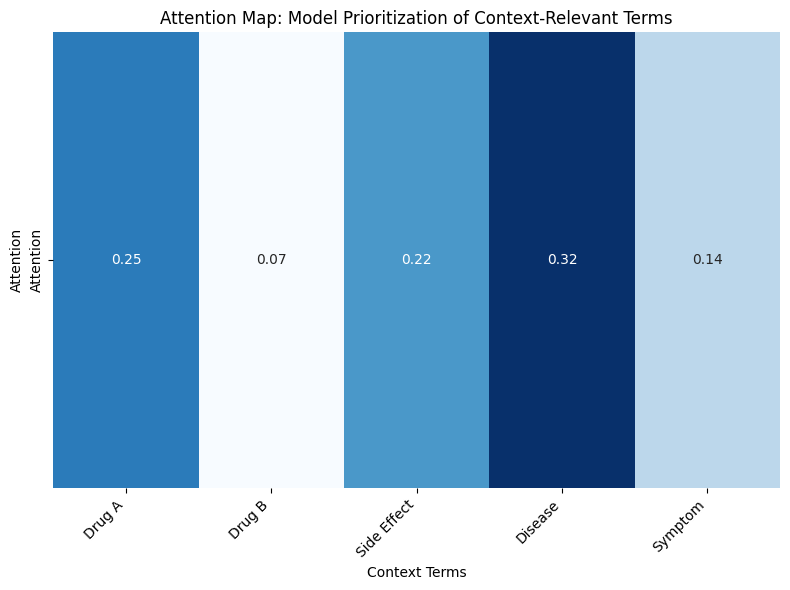

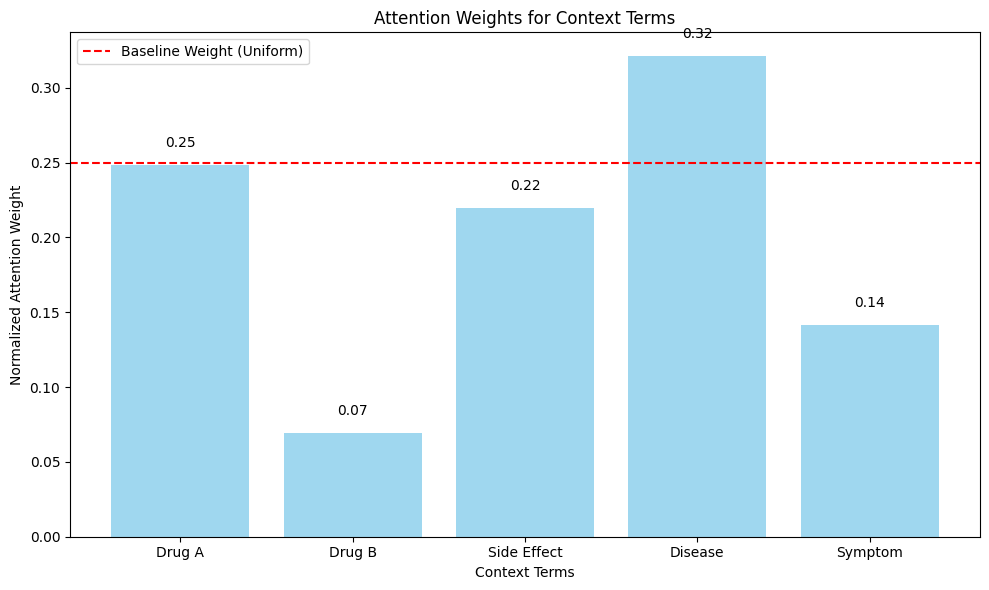


Attention Weights Summary:
Context Term  Attention Weight
     Disease          0.320930
      Drug A          0.248388
 Side Effect          0.219884
     Symptom          0.141181
      Drug B          0.069617


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example context and attention weights for demonstration
context_terms = ["Drug A", "Drug B", "Side Effect", "Disease", "Symptom"]
attention_weights = np.random.rand(len(context_terms))  # Replace with actual attention weights
attention_weights /= np.sum(attention_weights)  # Normalize the weights

# Visualize attention weights using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    [attention_weights],
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=context_terms,
    yticklabels=["Attention"],
    cbar=False
)

plt.title("Attention Map: Model Prioritization of Context-Relevant Terms")
plt.xlabel("Context Terms")
plt.ylabel("Attention")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Alternatively, a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(context_terms, attention_weights, color='skyblue', alpha=0.8)
plt.axhline(y=0.25, color='r', linestyle='--', label='Baseline Weight (Uniform)')

for i, v in enumerate(attention_weights):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.title("Attention Weights for Context Terms")
plt.xlabel("Context Terms")
plt.ylabel("Normalized Attention Weight")
plt.legend()
plt.tight_layout()
plt.show()

# Summarize the attention scores in a DataFrame for interpretability
attention_df = pd.DataFrame({
    "Context Term": context_terms,
    "Attention Weight": attention_weights
})
attention_df = attention_df.sort_values(by="Attention Weight", ascending=False)
print("\nAttention Weights Summary:")
print(attention_df.to_string(index=False))
